In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.preprocessing import LabelEncoder


In [2]:
df_original = pd.read_csv("subway-data.csv")

df_original = df_original[df_original["Vehicle"] != 0]

In [3]:
#Data Trimmer

# Step 1: Calculate the frequency of each code
code_counts = df_original['Code'].value_counts()

# Step 2: Calculate the cumulative distribution of the counts
cumulative_freq = code_counts.cumsum() / code_counts.sum()

# Step 3: Find the 95% threshold for cumulative frequency
threshold_95 = cumulative_freq[cumulative_freq <= 0.95].index

# Step 4: Create a new column to filter out codes outside of the 95% distribution
df_original['95_percent_codes'] = df_original['Code'].where(df_original['Code'].isin(threshold_95))



In [4]:
df = df_original.copy().dropna(subset=['95_percent_codes'])

In [5]:
# Count the occurrences of each unique value in the 'Code' column
code_counts = df['95_percent_codes'].value_counts()

In [26]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a new column for the mapped numerical values
df.loc[:, 'Day_numeric'] = label_encoder.fit_transform(df['Day'])

df.loc[:, 'station_numeric'] = label_encoder.fit_transform(df['Station'])

df.loc[:, 'line_numeric'] = label_encoder.fit_transform(df['Line'])

df.loc[:, 'vehicle_numeric'] = label_encoder.fit_transform(df['Vehicle'])

df.loc[:, 'code_numeric'] = label_encoder.fit_transform(df['95_percent_codes'])



# Categorize min_delay into bins (categories)
bins = [0, 3, 1000]  # Define bin edges
labels = ['Average Delay', 'Above Average Delay']  # Labels for the categories


# Create a new column 'min_delay_category' for the categories
df.loc[:, 'min_delay_category'] = pd.cut(df['Min Delay'], bins=bins, labels=labels, right=False)

In [27]:
target = 'min_delay_category'
source1 = 'Day_numeric'
source2 = 'station_numeric'
source3 = 'line_numeric'
source4 = 'vehicle_numeric'
source5 = 'code_numeric'


# Define features (X) and target (y)
X = df[[source1, source2, source3, source4, source5]]  # Example features (add more if necessary)
y = df[target]  # Target: the categorized 'Min Delay'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf = 20, min_samples_split = 99)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate the model: Accuracy on training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

"""Accuracy Calculations"""
# Convert categorical labels to string format for comparison
y_test_numeric = y_test.astype(str)
y_test_pred_numeric = y_test_pred.astype(str)

# Define the bin label
bin_label = 'Above Average Delay'

# Get indexes where y_test is 'Above Average Delay'
bin_indices = (y_test_numeric == bin_label)

# Extract actual and predicted values for this bin
y_test_bin = y_test_numeric[bin_indices]
y_test_pred_bin = y_test_pred_numeric[bin_indices]

# Compute accuracy for 'Above Average Delay'
bin_accuracy = accuracy_score(y_test_bin, y_test_pred_bin)


"""Precision Calculation
"""
# Convert categorical labels to numeric for evaluation
y_test_numeric = y_test.astype(str)
y_test_pred_numeric = y_test_pred.astype(str)

# Compute precision for 'Above Average Delay'
bin_label = 'Above Average Delay'
precision = precision_score(y_test_numeric, y_test_pred_numeric, pos_label=bin_label)




print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Accuracy for '{bin_label}': {bin_accuracy:.4f}")
print(f"Precision for '{bin_label}': {precision:.4f}")

Training Accuracy: 0.7171396564600448
Test Accuracy: 0.6919342793129201
Accuracy for 'Above Average Delay': 0.8879
Precision for 'Above Average Delay': 0.6870


/tmp/ipykernel_132/905931207.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=code_counts.index, y=code_counts.values, palette="viridis")


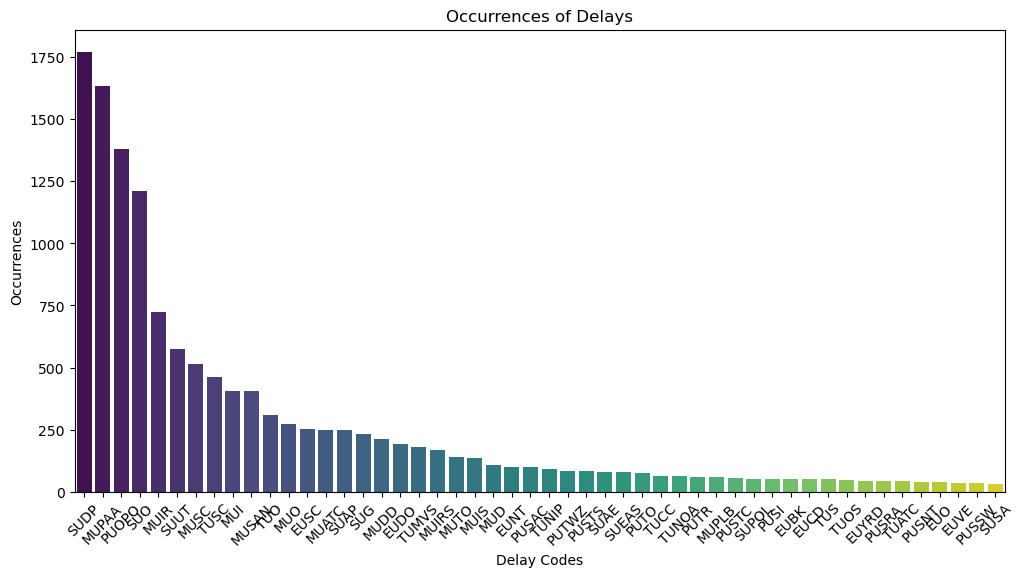

In [22]:
# Extra visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each code
code_counts = df_original['95_percent_codes'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=code_counts.index, y=code_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Delay Codes")
plt.ylabel("Occurrences")
plt.title("Occurrences of Delays")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


In [28]:
average_delay = df_original['Min Delay'].median()

print(f"The average delay time is: {average_delay}")

The average delay time is: 3.0
